## XGBoost Models

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
full_df = pd.read_csv('data/preprocessed_normalized_GWP.csv')
pca_df = pd.read_csv('data/PCA_components_GWP.csv')
mi_df = pd.read_csv('data/MI_variables.csv')

# XGB Full Data Set

In [55]:
X_full = full_df.drop(['GWP'], axis=1)
y_full = full_df['GWP']
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.2)

dtrain_reg = xgb.DMatrix(X_full_train, y_full_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_full_test, y_full_test, enable_categorical=True)

In [56]:
params = {}
xgb_model = xgb.train(params = params, dtrain = dtrain_reg, num_boost_round = 1000)
full_pred = xgb_model.predict(dtest_reg)

print("MSE:", mean_squared_error(full_pred, y_full_test))
print("R^2:", r2_score(full_pred, y_full_test))

MSE: 12.626694527610306
R^2: -2.3548960782527923


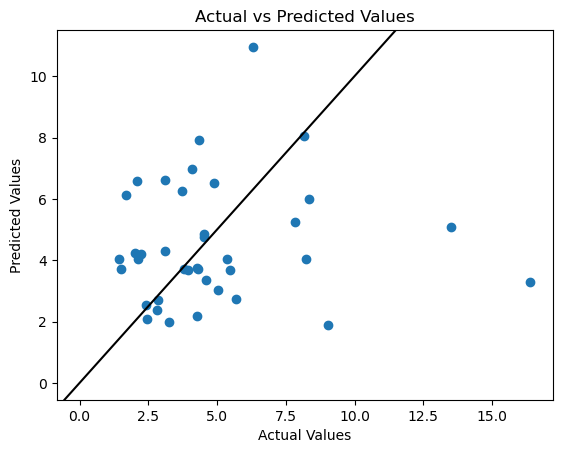

In [57]:
plt.scatter(y_full_test, full_pred)
plt.axline((0, 0), slope=1.0,).set_color('black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## XGBoost PCA Data Set

In [58]:
X_pca = pca_df.drop(['GWP'], axis=1)
y_pca = pca_df['GWP']
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.2)

dtrain_reg_pca = xgb.DMatrix(X_pca_train, y_pca_train, enable_categorical=True)
dtest_reg_pca = xgb.DMatrix(X_pca_test, y_pca_test, enable_categorical=True)

In [64]:
params = {}
xgb_model = xgb.train(params = params, dtrain = dtrain_reg_pca, num_boost_round = 10000)
pca_pred = xgb_model.predict(dtest_reg_pca)

print("MSE:", mean_squared_error(pca_pred, y_pca_test))
print("R^2:", r2_score(pca_pred, y_pca_test))

MSE: 583.4554751733517
R^2: -0.5998688589436594


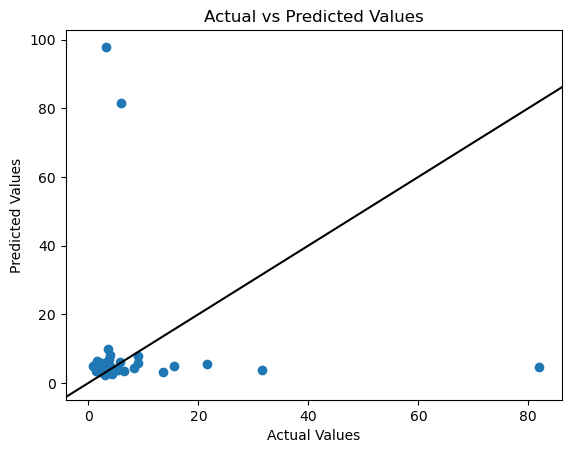

In [65]:
plt.scatter(y_pca_test, pca_pred)
plt.axline((0, 0), slope=1.0,).set_color('black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## XGBoost MI Data Set

In [61]:
X_mi = mi_df.drop(['GWP'], axis=1)
y_mi = mi_df['GWP']
X_mi_train, X_mi_test, y_mi_train, y_mi_test = train_test_split(X_mi, y_mi, test_size=0.2)

dtrain_reg_mi = xgb.DMatrix(X_mi_train, y_mi_train, enable_categorical=True)
dtest_reg_mi = xgb.DMatrix(X_mi_test, y_mi_test, enable_categorical=True)

In [62]:
params = {}
xgb_model = xgb.train(params = params, dtrain = dtrain_reg_mi, num_boost_round = 1000)
mi_pred = xgb_model.predict(dtest_reg_mi)

print("MSE:", mean_squared_error(mi_pred, y_mi_test))
print("R^2:", r2_score(mi_pred, y_mi_test))

MSE: 182.6544331677999
R^2: -13.335127044484418


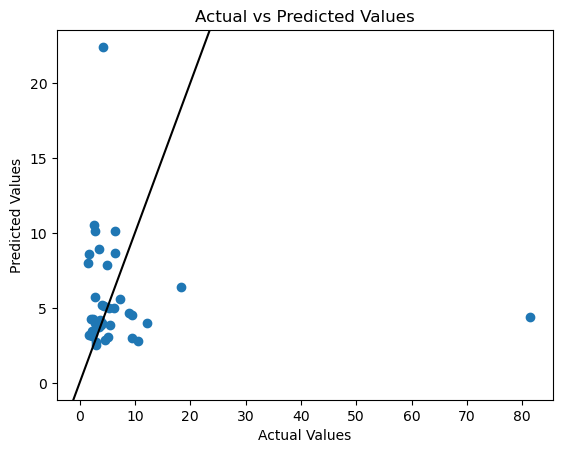

In [63]:
plt.scatter(y_mi_test, mi_pred)
plt.axline((0, 0), slope=1.0,).set_color('black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()